In [1]:
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#读取数据
df1 = pd.read_excel('D:\CACLE\cs2_35.xlsx')
ftr=['cycle','capacity','SoH','CCCT'] 
df11=df1[ftr]
data_total=df1[(df11['cycle']>=1)]
data_capacity = data_total.iloc[:,1:2].values
data_pre_Up = pd.read_csv("D:\\dada\\拼接实验\\数据重构数据\\马里兰\\35示例实验\\实验结果\\predict_35_Up降序.csv") #预测上限
data_pre_Up = data_pre_Up['mohu_35_Up']
data_pre_Low = pd.read_csv("D:\\dada\\拼接实验\\数据重构数据\\马里兰\\35示例实验\\实验结果\\predict_35_Low降序.csv") #预测下限
data_pre_Low = data_pre_Low['mohu_35_Low']

ww = pd.read_excel("D:\dada\拼接实验\马里兰窗口长度.xlsx") #每个窗口的具体长度
ww = ww['w_35'] 

print(len(data_pre_Low))
print(len(ww))

56
88


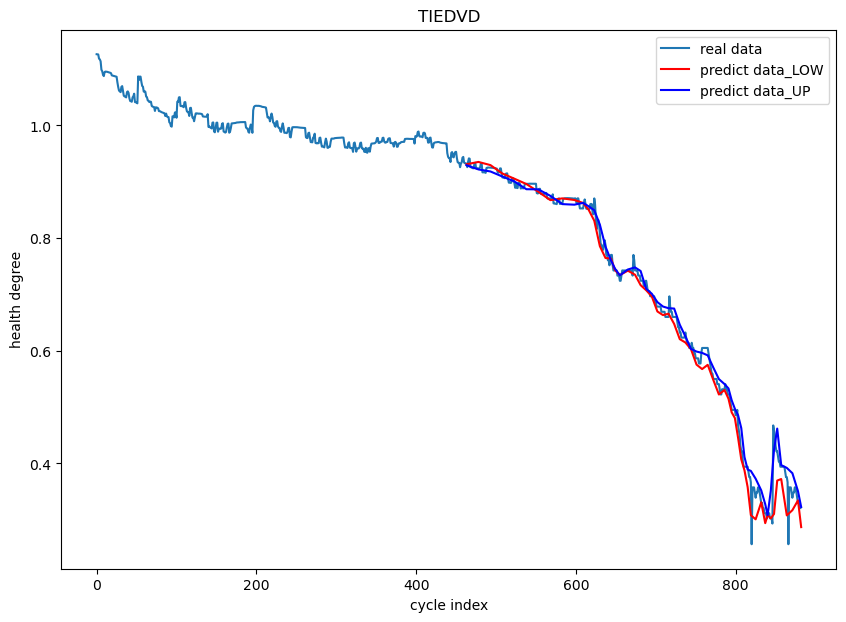

In [5]:
#画出区间预测效果图
size_train=33 #颗粒预测起点
shjiujok = sum(ww[:size_train-1])#预测真实值的起点
ww_pre = ww[size_train-1:] #预测的颗粒
ww_pre = np.array(ww_pre)
fsjh = []#粒化后的值在真实值上位置的表示
leijis = 0
for i in range(len(ww)):
    if(ww[i]%2==0):
        fsjh.append(int(ww[i]/2+leijis))
        leijis=leijis+ww[i]
    else:
        fsjh.append(int((ww[i]+1)/2+leijis))
        leijis=leijis+ww[i]
#找出预测部分的点的对应位置
fsjh = fsjh[size_train-1:]

fig12 = plt.figure(figsize=(10,7))
plt.plot(range(0,len(data_capacity)),data_capacity,label = 'real data')
plt.plot(fsjh,data_pre_Low,label = 'predict data_LOW',color='r')
plt.plot(fsjh,data_pre_Up,label = 'predict data_UP',color='b')
plt.title('TIEDVD')
plt.xlabel('cycle index')
plt.ylabel('health degree')
plt.legend()
plt.show()

In [6]:
#评价指标
#特异性预测区间的宽度
a = data_pre_Low
b = data_pre_Up
V =np.array(b-a)
V_average = sum(V)/len(V)

#覆盖范围
leiji =shjiujok-1
Q =[] #覆盖范围指标
for i in range(0,len(data_pre_Low)):
    q = 0
    for j in range(0,ww_pre[i]):
        leiji = leiji+1
        if (a[i]<=data_capacity[leiji]<=b[i]):
            f=1
        else:
            f=0
        q1 = 100*f/(ww_pre[i])
        q = q+q1
    Q.append(q)

#把Q%变为Q
Q_100 = []
for i in range(0,len(Q)):
    SHG = Q[i]/10000
    Q_100.append(SHG)

# #综合指标P 
P = (100*sum(Q_100/V))/len(V)      
Q_average = sum(Q)/len(Q)

print(V_average,P,Q_average)

0.02152491892857144 30.57944092428358 49.39200680272109


In [7]:
V_average =round(V_average,4)
Q_average =round(Q_average,4)
P =round(P,4)
print('V_average: %.5f' % V_average)
print('Q_average: %.5f' % Q_average)
print('P: %.5f' % P)

V_average: 0.02150
Q_average: 49.39200
P: 30.57940
